In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import isinf
from os import path
from sys import path as syspath

syspath.append("../../perps")
import modules.figures as figs
from datetime import datetime

plots_path = "../../../papers/perps-overview/plots/"


def plot(S, F, r, a, b, plots_path=None, show=False):
    x_axis = (F - S) / S
    R = np.array(
        [
            (f - s) / s + min(a, max(b, ((1 + r) * s - f) / s))
            for f, s in np.column_stack((F, S))
        ]
    )

    plt.ioff()
    plt.clf()

    plt.plot(x_axis, R)
    plt.xlabel(r"$\frac{F-S}{S}$")
    plt.ylabel(r"$R$")
    plt.xticks(np.arange(min(x_axis), 1.1 * max(x_axis), abs(min(x_axis))))
    if isinf(a) and isinf(-b):
        plt.title("r = {r:.2%}, a = {a}, b = {b}".format(r=r, a=a, b=b))
        plt.yticks(np.arange(0.5 * min(R), 1.5 * max(R), 0.5 * abs(min(R))))
    else:
        plt.title("r = {r:.2%}, a = {a:.2%}, b = {b:.2%}".format(r=r, a=a, b=b))
    if not plots_path is None:
        plt.savefig(
            path.join(plots_path, "r_{r}_a_{a}_b_{b}.png".format(r=r, a=a, b=b))
        )
    if show:
        plt.show()

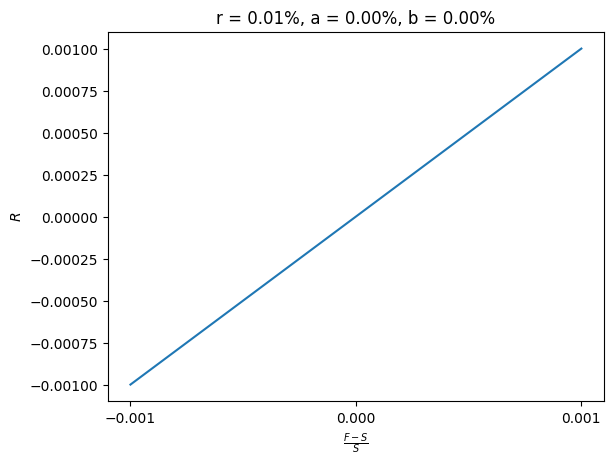

In [2]:
# funding rate plots
a = 0.0005
b = -0.0005
r = 0.0001

grid = np.linspace(-0.001, 0.001, 201)
S_const = 100
S = np.array([S_const for x in grid])
F = np.array([S_const * (1 + x) for x in grid])

plot(S, F, r, float("inf"), -float("inf"), plots_path=plots_path)
plot(S, F, r, 0.0005, -0.0005, plots_path=plots_path)
plot(S, F, r, 0, 0, plots_path=plots_path)

In [6]:
start_date = datetime(2023, 5, 1)
end_date = datetime(2023, 6, 1)
spot_curve_1_path = "../../perps/data/spot_1.csv"
perp_curve_1_path = "../../perps/data/perps_1.csv"

spot_curve, perp_curve = figs.spot_perp_difference(
    start_date=start_date,
    end_date=end_date,
    use_spot_curve_1=True,
    spot_curve_1_path=spot_curve_1_path,
    use_perp_curve_1=True,
    perp_curve_1_path=perp_curve_1_path,
    show=False,
    plot_save_path=path.join(plots_path, "example_curves.png"),
)

funding_schedule_minutes = 60
spot_sampling_minutes = 60
perp_sampling_minutes = 60

# figs.funding_periods(
#     start_date=start_date, 
#     end_date=end_date,
#     spot_curve=spot_curve,
#     perp_curve=perp_curve, 
#     plot_save_path=path.join(plots_path, "example_funding.png"),
#     funding_schedule_minutes=funding_schedule_minutes,
#     spot_sampling_minutes=spot_sampling_minutes,
#     perp_sampling_minutes=perp_sampling_minutes,
# )